<a href="https://colab.research.google.com/github/JAntonioRosales/CE888-Data-Science/blob/main/project/code/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality (Red Wine Dataset)

## 1 - Description

This dataset is one of two that were created for the study conducted by Cortez et al. (2009) regarding *vinho verde* wine quality.

We will use the **red wine** samples. With 1599 entries, each one was tested using the most common physicochemical tests and excluding privacy variables, such as grape types, wine brand, etc.

The tested atributes were:

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

To obtain the output variable, **quality**, each sample was evaluated by at least three wine experts, where each one graded the sample's quality between 0 (very bad) and 10 (very excellent). The median of the evaluations was the recorded quality.

The speficic dataset we will use, posted by Naresh Bhat on Kaggle, already performed minimal preprocessing to binarize wine quality into 'bad' or 'good'. Those samples that were evaluated from 0 to 5 were classified as bad, and those from 6 to 10, good.

Binary dataset: https://www.kaggle.com/nareshbhat/wine-quality-binary-classification.

Original dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality.

*P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. Available at: https://doi.org/10.1016/j.dss.2009.05.016.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Function for surrogate creation
def create_surrogate(majority, minority, imb):
  
  # Subsampling
  no_min_samples = int(majority.shape[0] * ((1/imb) - 1))
  min_indices = np.random.choice(range(minority.shape[0]), size=no_min_samples, replace=False) # Make sure we don't get the same sample more than once
  min_samples = minority.iloc[min_indices]
  
  # Surrogate dataset
  return pd.concat([majority, min_samples])

## 2 - Data exploration and visualization

We begin by loading the dataset.

In [3]:
# Loading and visualizing the data
wine = pd.read_csv('https://raw.githubusercontent.com/JAntonioRosales/CE888-Data-Science/main/project/datasets/wine_quality.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


On a first glance, the dataset looks fairly well. Still, we can print detailed information.

In [4]:
# Printing dataset info
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
# Counting missing values
wine.isnull().sum().sum()

0

This dataset has 1599 samples, 11 features, and one target. Luckily, there are no missing values.

All of the features are already **numerical**, and only the target is labelled as having 'good' or 'bad' quality. We will encode it so **1 == good quality** and **0 == bad quality**.

In [6]:
# Encoding the label to numeric values
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
# Shape of the dataset
wine.shape

(1599, 12)

And just to reiterate, the dataset has 1599 samples, 11 features, and one target.

Now that we are a bit familiarized with the data, we can look at numerical information and visualize our features.

In [8]:
# Info for numerical features
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


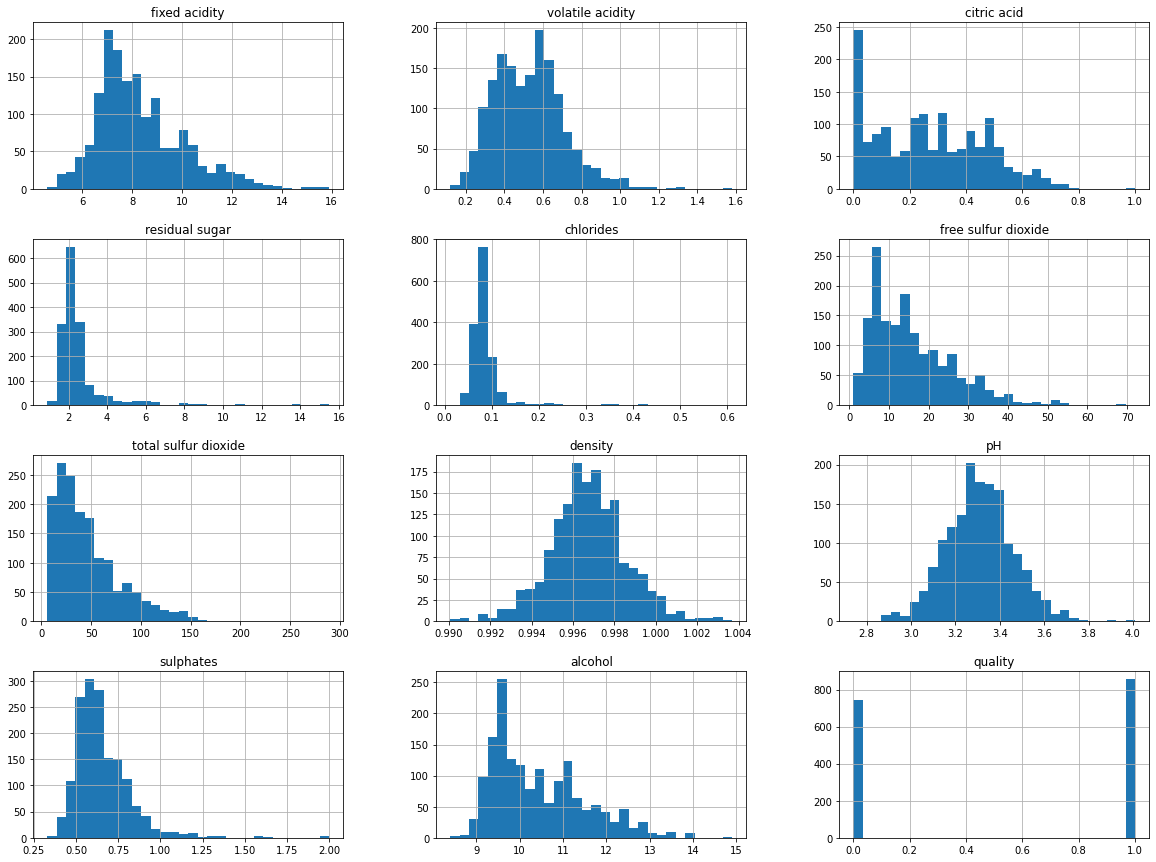

In [9]:
# Plotting numerical features
blob = wine.hist(bins=30, figsize=(20, 15))
plt.savefig('wine_complete_hist.pdf', dpi=1200, bbox_inches='tight')

We can see that the 11 attributes are **continuous**, but in different ranges. *Fixed acidity* and *residual sugar*, for example, have a similar range from 0 to 16, while *citric acid* is bound between 0 and 1, and *total sulfur dioxide* has a maximum value of approximately 300.

As with the Song Likeability dataset, the values do not need scaling for the baseline model, but will be scaled later on during the clustering stage.

Another interesting observation is that the majority of the features are strongly skewed towards the low values of their respective spectrum, except for *density* and *pH*, which are more normally distributed.

Now, we will analyze the label before creating surrogates and splitting into training and testing sets.

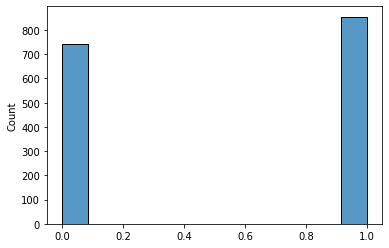

In [10]:
# Plotting 'quality' histogram to analyze its balance
blob = sns.histplot(wine['quality'].values)

As mwntioned, a binary variable that is either 0 (bad) or 1 (good) and that is reasonably balanced.

In [11]:
# Calculating the imbalance of the dataset
value, count = np.unique(wine['quality'].values, return_counts=True)
print('Bad:', (count[0]*100/(count[0]+count[1])), '%')
print('Good:', (count[1]*100/(count[0]+count[1])), '%')

Bad: 46.529080675422136 %
Good: 53.470919324577864 %


Now, let us plot the distribution of zeroes and ones to observe how they were recorded in the dataset.

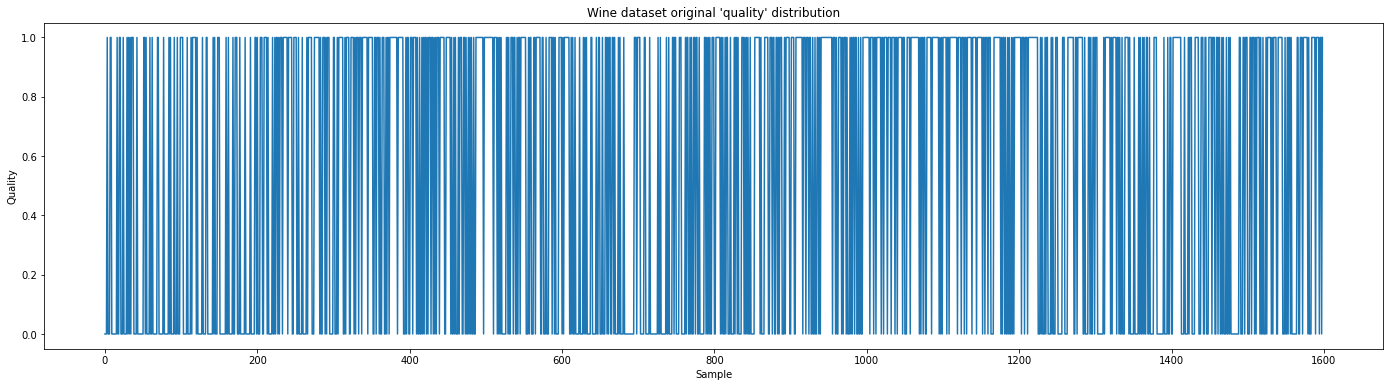

In [12]:
# Plotting the distribution of 0s and 1s
plt.figure(figsize=(24,6))
sns.lineplot(data=wine['quality'])
plt.title("Wine dataset original 'quality' distribution")
plt.xlabel('Sample')
plt.ylabel('Quality')
plt.savefig('wine_target_dist.pdf', dpi=1200, bbox_inches='tight')

As opposed to the Song Likeability dataset, where the first half was exclusively ones and the second one was zeroes, these targets are mixed. Still, when dividing into the testing and training sets we will make sure we shuffle the data.

## 3 - Surrogates and splitting

We will create the three surrogate imbalanced datasets.

In this case we will assume the wine experts were more rigorous when judging the samples, consequently classifying less wines as having good quality. We will keep the same number of bad quality wines as in the original dataset, while decreasing the good quality ones accordingly.

In [13]:
# Dividing the samples into good and bad quality
good = wine.loc[wine['quality']==1]
bad = wine.loc[wine['quality']==0]

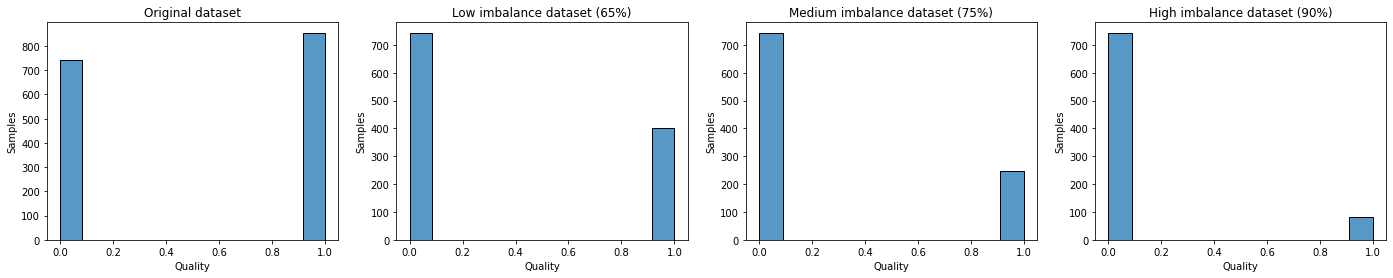

In [14]:
# Creating surrogate datasets
wine_li = create_surrogate(bad, good, 0.65) # Low imbalance
wine_mi = create_surrogate(bad, good, 0.75) # Medium imbalance
wine_hi = create_surrogate(bad, good, 0.90) # High imbalance

# Plotting the different datasets
plt.figure(figsize=(24,4))

for plot in range(1,5):
  plt.subplot(1,4,plot)
  plt.xlabel('Quality')
  plt.ylabel('Samples')
  
  # Original set
  if plot == 1:
    sns.histplot(wine['quality'].values)
    plt.title('Original dataset')
  
  # Low imbalance dataset
  elif plot == 2:
    sns.histplot(wine_li['quality'].values)
    plt.title('Low imbalance dataset (65%)')
  
  # Medium imbalance dataset
  elif plot == 3:
    sns.histplot(wine_mi['quality'].values)
    plt.title('Medium imbalance dataset (75%)')
  
  # High imbalance dataset
  else:
    sns.histplot(wine_hi['quality'].values)
    plt.title('High imbalance dataset (90%)')

plt.savefig('wine_surrogates.pdf', dpi=1200, bbox_inches='tight')
plt.show()

In [15]:
# Confirming the imbalances are correct
value_li, count_li = np.unique(wine_li['quality'].values, return_counts=True)
value_mi, count_mi = np.unique(wine_mi['quality'].values, return_counts=True)
value_hi, count_hi = np.unique(wine_hi['quality'].values, return_counts=True)
counts = [count_li, count_mi, count_hi]

for surr in range(3):
  print('Surrogate', surr + 1)
  print('Bad:', (counts[surr][0]*100/(counts[surr][0]+counts[surr][1])), '%')
  print('Good:', (counts[surr][1]*100/(counts[surr][0]+counts[surr][1])), '%\n')

Surrogate 1
Bad: 65.03496503496504 %
Good: 34.96503496503497 %

Surrogate 2
Bad: 75.07568113017155 %
Good: 24.924318869828458 %

Surrogate 3
Bad: 90.0726392251816 %
Good: 9.927360774818402 %



The surrogates were created correctly, so we can proceed to splitting into training and testing.

In [16]:
# Separating training and testing sets with stratification
wine_train, wine_test = train_test_split(wine, test_size=0.2, random_state=18, shuffle=True, stratify=wine['quality'].values)
wine_li_train, wine_li_test = train_test_split(wine_li, test_size=0.2, random_state=18, shuffle=True, stratify=wine_li['quality'].values)
wine_mi_train, wine_mi_test = train_test_split(wine_mi, test_size=0.2, random_state=18, shuffle=True, stratify=wine_mi['quality'].values)
wine_hi_train, wine_hi_test = train_test_split(wine_hi, test_size=0.2, random_state=18, shuffle=True, stratify=wine_hi['quality'].values)

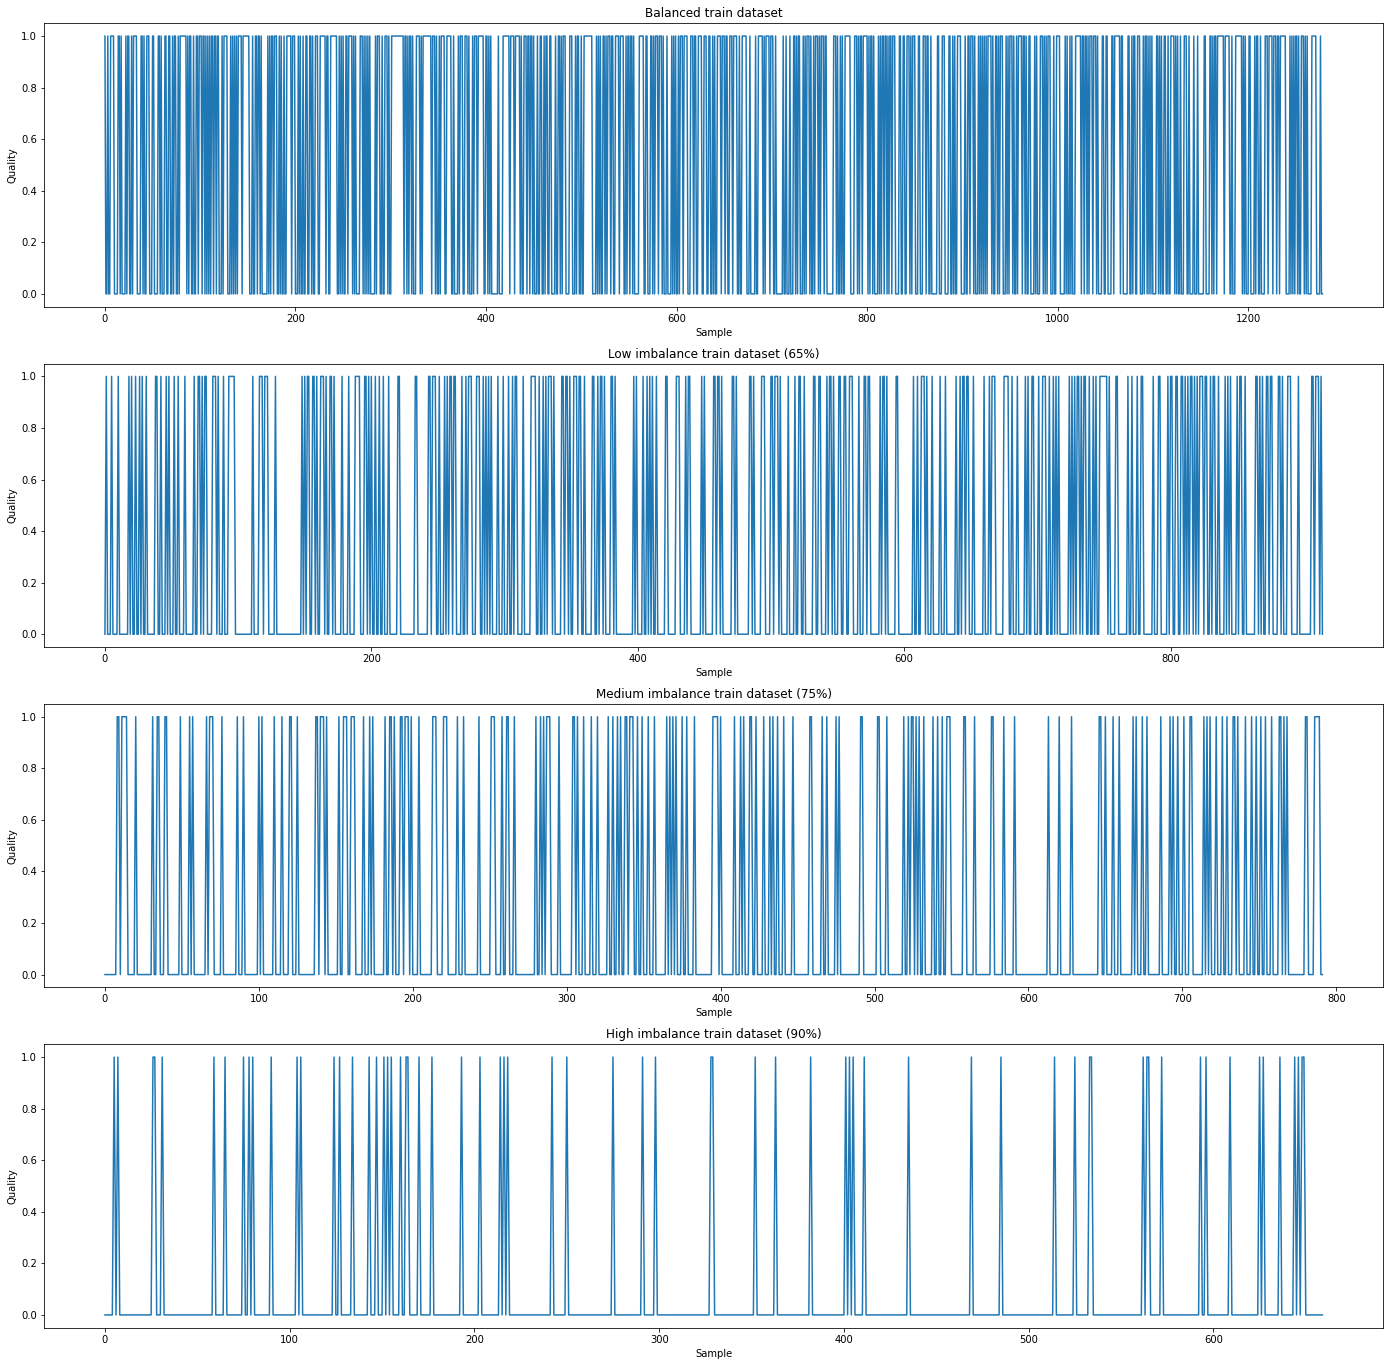

In [17]:
# Plotting the different datasets' distribution of 0s and 1s
plt.figure(figsize=(24,24))

for plot in range(1,5):
  plt.subplot(4,1,plot)
  plt.xlabel('Sample')
  plt.ylabel('Quality')

  # Balanced set
  if plot == 1:
    indexed_set = wine_train.set_index(pd.Series(np.arange(wine_train.shape[0]))) # Indexes the new shuffled dataset in ascending order to show the plots correctly
    plt.title('Balanced train dataset')                                           # otherwise, the plot would sort with the original indexes, showing the same half & half split 

  # Low imbalance dataset
  elif plot == 2:
    indexed_set = wine_li_train.set_index(pd.Series(np.arange(wine_li_train.shape[0])))
    plt.title('Low imbalance train dataset (65%)')

  # Medium imbalance dataset
  elif plot == 3:
    indexed_set = wine_mi_train.set_index(pd.Series(np.arange(wine_mi_train.shape[0])))
    plt.title('Medium imbalance train dataset (75%)')

  # High imbalance dataset
  else:
    indexed_set = wine_hi_train.set_index(pd.Series(np.arange(wine_hi_train.shape[0])))
    plt.title('High imbalance train dataset (90%)')

  sns.lineplot(data=indexed_set['quality'])

plt.savefig('wine_surrogates_dist.pdf', dpi=1200, bbox_inches='tight')
plt.show()

The surrogates mix zeros and ones correctly and, as with the Song Likeability dataset, we can also appreciate how the total number of good wines decreases for each surrogate as the imbalance increases, showing opposite peaks as the Songs dataset in the most imbalanced surrogate.